In [1]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                          "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                          "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                          "small", "large", "small", "small",
                          "large"],                    
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [4]:
import numpy as np

table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [5]:
#df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
#                          "bar", "bar", "bar", "bar"],
#                    "B": ["one", "one", "one", "two", "two",
#                          "one", "one", "two", "two"],
#                    "C": ["small", "large", "large", "small",
#                          "small", "large", "small", "small",
#                          "large"],                    
#                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
#                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})


1. 17세 이하
2. 18세 이상, 24세 이하
3. 25세 이상, 35세 이하
4. 36세 이상, 44세 이하
5. 45세 이상, 54세 이하
6. 55세 이상

columns = sex, age, confirmed, cancled, refund, total 


In [6]:
table2 = pd.DataFrame({"Age" : [20, 25, 30, 33, 51, 36, 22, 25, 27, 31,
                                26, 28, 23, 46, 45, 36, 30, 39, 34, 19],
                       "state" : ["confirmed", "confirmed", "confirmed", "cancled","confirmed", "confirmed", "confirmed", 
                                  "cancled","confirmed", "confirmed", "confirmed", "cancled","confirmed", "confirmed",
                                 "confirmed", "confirmed", "confirmed", "cancled", "confirmed", "cancled"],
                      "Gender" : ["female", "male","female", "male","female", "male","female", "male","female",
                                 "female","female","female","female","female","male","female","female",
                                 "female","male","male"],
                      "Price" : [ 50000, 60000, 1000, 12000, 10000, 9900,5900, 43000, 9900,
                                 80000, 73000, 61000, 1200, 7700, 8100, 5000, 32000, 40000, 36000, 22000]})

table2

,Age,state,Gender,Price
0,20,confirmed,female,50000
1,25,confirmed,male,60000
2,30,confirmed,female,1000
3,33,cancled,male,12000
4,51,confirmed,female,10000
5,36,confirmed,male,9900
6,22,confirmed,female,5900
7,25,cancled,male,43000
8,27,confirmed,female,9900
9,31,confirmed,female,80000


In [7]:
pd.pivot_table(table2, index ="state" , values ="Price")


,Price
state,
cancled,35600
confirmed,25980


In [8]:
pd.pivot_table(table2, index ="state" , values ="Price",aggfunc =['mean', 'sum'])

,mean,sum
,Price,Price
state,,
cancled,35600,178000
confirmed,25980,389700


In [9]:
pd.pivot_table(table2, 
               index =["Age","state"] , 
               values = "Price",
               aggfunc =['mean', 'sum'])

mean    sum
               Price  Price
Age state                  
19  cancled    22000  22000
20  confirmed  50000  50000
22  confirmed   5900   5900
23  confirmed   1200   1200
25  cancled    43000  43000
    confirmed  60000  60000
26  confirmed  73000  73000
27  confirmed   9900   9900
28  cancled    61000  61000
30  confirmed  16500  33000
31  confirmed  80000  80000
33  cancled    12000  12000
34  confirmed  36000  36000
36  confirmed   7450  14900
39  cancled    40000  40000
45  confirmed   8100   8100
46  confirmed   7700   7700
51  confirmed  10000  10000

In [10]:
def age_set(Age): 
    if 0 <= Age <= 19:
        return "00 ~ 19"
    elif 20 <= Age <= 29:
        return "20 ~ 29"
    elif 30 <= Age <= 39:
        return "30 ~ 39"
    elif Age > 40:
        return "40 ~ 99"
 
    

table2["Age(Group)"] = table2["Age"].apply(age_set)

table2[["Age", "Age(Group)"]]

,Age,Age(Group)
0,20,20 ~ 29
1,25,20 ~ 29
2,30,30 ~ 39
3,33,30 ~ 39
4,51,40 ~ 99
5,36,30 ~ 39
6,22,20 ~ 29
7,25,20 ~ 29
8,27,20 ~ 29
9,31,30 ~ 39


In [11]:
table2.sort_values(by="Age(Group)", ascending = True)



,Age,state,Gender,Price,Age(Group)
19,19,cancled,male,22000,00 ~ 19
12,23,confirmed,female,1200,20 ~ 29
11,28,cancled,female,61000,20 ~ 29
10,26,confirmed,female,73000,20 ~ 29
8,27,confirmed,female,9900,20 ~ 29
7,25,cancled,male,43000,20 ~ 29
0,20,confirmed,female,50000,20 ~ 29
1,25,confirmed,male,60000,20 ~ 29
6,22,confirmed,female,5900,20 ~ 29
5,36,confirmed,male,9900,30 ~ 39


In [12]:
pd.pivot_table(table2,
              index = ["Age(Group)", "state"],
              values = "Price",
              aggfunc = ['mean', 'sum'])


mean     sum
                             Price   Price
Age(Group) state                          
00 ~ 19    cancled    22000.000000   22000
20 ~ 29    cancled    52000.000000  104000
           confirmed  33333.333333  200000
30 ~ 39    cancled    26000.000000   52000
           confirmed  27316.666667  163900
40 ~ 99    confirmed   8600.000000   25800

In [13]:
pd.pivot_table(table2,
              index = ["Age(Group)", "Gender"],
              values = "Price",
              aggfunc = ['mean', 'sum'])



mean     sum
                   Price   Price
Age(Group) Gender               
00 ~ 19    male    22000   22000
20 ~ 29    female  33500  201000
           male    51500  103000
30 ~ 39    female  31600  158000
           male    19300   57900
40 ~ 99    female   8850   17700
           male     8100    8100

In [14]:
def app_confirmed(state):
    if "confirmed" in state :
        return 1
    if "cancled" in state:
        return 0

def app_cancled(state):
    if "cancled" in state : 
        return 1
    if "confirmed" in state :
        return 0

table2["confirmed"] = table2["state"].apply(app_confirmed)
table2["cancled"] = table2["state"].apply(app_cancled)

table2[["state", "confirmed", "cancled"]]


,state,confirmed,cancled
0,confirmed,1,0
1,confirmed,1,0
2,confirmed,1,0
3,cancled,0,1
4,confirmed,1,0
5,confirmed,1,0
6,confirmed,1,0
7,cancled,0,1
8,confirmed,1,0
9,confirmed,1,0


In [15]:
table2["total"] = table2["confirmed"] + table2["cancled"]

table2[["total", "confirmed", "cancled"]]

,total,confirmed,cancled
0,1,1,0
1,1,1,0
2,1,1,0
3,1,0,1
4,1,1,0
5,1,1,0
6,1,1,0
7,1,0,1
8,1,1,0
9,1,1,0


In [16]:
table2["Price"].describe()


count       20.000000
mean     28385.000000
std      25459.984599
min       1000.000000
25%       8000.000000
50%      17000.000000
75%      44750.000000
max      80000.000000
Name: Price, dtype: float64

In [17]:
table2.groupby("Age(Group)")["Price","Gender"].describe().round()

Price                                                        \
           count     mean      std      min      25%      50%      75%   
Age(Group)                                                               
00 ~ 19      1.0  22000.0      NaN  22000.0  22000.0  22000.0  22000.0   
20 ~ 29      8.0  38000.0  28237.0   1200.0   8900.0  46500.0  60250.0   
30 ~ 39      8.0  26988.0  26081.0   1000.0   8675.0  22000.0  37000.0   
40 ~ 99      3.0   8600.0   1229.0   7700.0   7900.0   8100.0   9050.0   

                     
                max  
Age(Group)           
00 ~ 19     22000.0  
20 ~ 29     73000.0  
30 ~ 39     80000.0  
40 ~ 99     10000.0

In [18]:
pd.pivot_table(table2,
              index = ["Age(Group)", "Gender"],
              values = ["confirmed", "cancled","total"],
               aggfunc = 'sum',
               margins = True,
              margins_name= "total")


cancled  confirmed  total
Age(Group) Gender                           
00 ~ 19    male          1          0      1
20 ~ 29    female        1          5      6
           male          1          1      2
30 ~ 39    female        1          4      5
           male          1          2      3
40 ~ 99    female        0          2      2
           male          0          1      1
total                    5         15     20

In [19]:
#table['% of Total'] = (table.C / table.C.sum() * 100).astype(str) + '%'
#table['% of B'] = (table.C / table.groupby(level=0).C.transform(sum) * 100).astype(str) + '%'

table2["percentage(total)"] = ( table2["confirmed"] / table2["confirmed"].sum())

table2[["percentage(total)", "confirmed", "total"]]

,percentage(total),confirmed,total
0,0.066667,1,1
1,0.066667,1,1
2,0.066667,1,1
3,0.000000,0,1
4,0.066667,1,1
5,0.066667,1,1
6,0.066667,1,1
7,0.000000,0,1
8,0.066667,1,1
9,0.066667,1,1


In [20]:
pivot_table2= pd.pivot_table(table2,
              index = ["Age(Group)", "Gender"],
              values = ["confirmed", "cancled","total"],
               aggfunc = 'sum')

pivot_table2

cancled  confirmed  total
Age(Group) Gender                           
00 ~ 19    male          1          0      1
20 ~ 29    female        1          5      6
           male          1          1      2
30 ~ 39    female        1          4      5
           male          1          2      3
40 ~ 99    female        0          2      2
           male          0          1      1

In [26]:
%matplotlib inline

import seaborn as sns 

import matplotlib.pyplot as plt

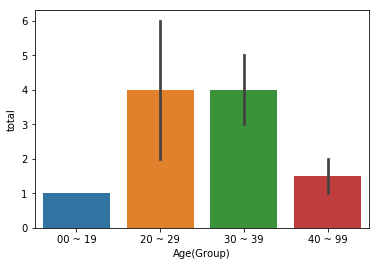

In [37]:
sns.barplot(data = pivot_table2.reset_index(), x = "Age(Group)", y = "total")

In [21]:
# >>> df1_transposed = df1.T  or df1.transpose()

pivot_table2.transpose()

Age(Group) 00 ~ 19 20 ~ 29      30 ~ 39      40 ~ 99     
Gender        male  female male  female male  female male
cancled          1       1    1       1    1       0    0
confirmed        0       5    1       4    2       2    1
total            1       6    2       5    3       2    1

In [22]:
table2.groupby("Age(Group)")["Gender"].describe().round()

,count,unique,top,freq
Age(Group),,,,
00 ~ 19,1,1,male,1
20 ~ 29,8,2,female,6
30 ~ 39,8,2,female,5
40 ~ 99,3,2,female,2


In [23]:
2/18

0.1111111111111111